In [51]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve

import os
print(os.listdir("../Skin/skin-cancer-mnist-ham10000"))

['HAM10000_images', 'HAM10000_images_part_1.zip', 'HAM10000_images_part_2.zip', 'HAM10000_metadata.csv', 'hmnist_28_28_L.csv', 'hmnist_28_28_RGB.csv', 'hmnist_8_8_L.csv', 'hmnist_8_8_RGB.csv']


In [52]:
#import sys
#print(sys.path)

In [53]:
# Paths and roots to the important files
path='../Skin/skin-cancer-mnist-ham10000/'
csv_file='../Skin/skin-cancer-mnist-ham10000/HAM10000_metadata.csv'

In [54]:
#df=pd.read_csv(csv_file).set_index('image_id')
df=pd.read_csv(csv_file)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [55]:
df.dx.value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

In [56]:
# Categories of the diferent diseases
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [57]:
df.dx=df.dx.astype('category',copy=True)
df['labels']=df.dx.cat.codes # Convert the labels to numbers
df['lesion']= df.dx.map(lesion_type_dict)
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,labels,lesion
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,Benign keratosis
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,Benign keratosis
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,Benign keratosis
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,Benign keratosis
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,Benign keratosis


In [58]:
df.lesion.value_counts()

Melanocytic nevi        6705
Melanoma                1113
Benign keratosis        1099
Basal cell carcinoma     514
Actinic keratoses        327
Vascular lesions         142
Dermatofibroma           115
Name: lesion, dtype: int64

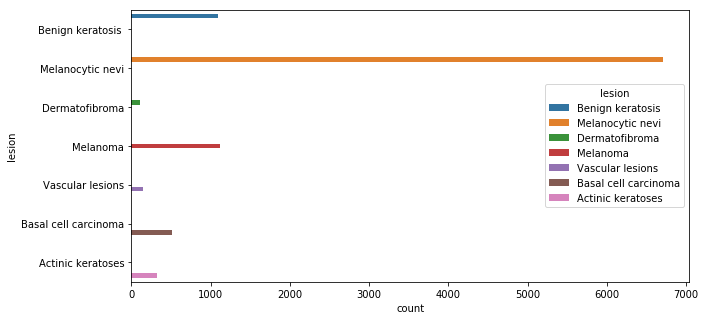

In [59]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
sns.countplot(y='lesion',data=df, hue="lesion",ax=ax1)

In [61]:
#Extract file name from the file path in a dataframe
from glob import glob
paths = glob('../Skin/skin-cancer-mnist-ham10000/HAM10000_images/*.jpg')
image = [os.path.basename(x) for x in paths ]
data_tuples = list(zip(paths,image))
#data_tuples
Skindf = pd.DataFrame(data_tuples, columns=['paths','image'])

In [62]:
export_csv = Skindf.to_csv (r'..\skin_dataframe.csv', index = None, header=True)

In [63]:
df['image'] = df['image_id']+'.jpg'
df["image_path"] = np.nan
df.head(5)

,lesion_id,image_id,dx,dx_type,age,sex,localization,labels,lesion,image,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,Benign keratosis,ISIC_0027419.jpg,NaN
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,Benign keratosis,ISIC_0025030.jpg,NaN
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,Benign keratosis,ISIC_0026769.jpg,NaN
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,Benign keratosis,ISIC_0025661.jpg,NaN
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,Benign keratosis,ISIC_0031633.jpg,NaN


In [64]:
import pandasql as ps

sqlcode = '''
select Skindf.paths,df.* from df , Skindf 
where Skindf.image=df.image
'''
#print(ps.sqldf(sqlcode, locals()))
df['image_path'] = ps.sqldf(sqlcode, locals())

In [65]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,labels,lesion,image,image_path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,2,Benign keratosis,ISIC_0027419.jpg,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,2,Benign keratosis,ISIC_0025030.jpg,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,2,Benign keratosis,ISIC_0026769.jpg,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,2,Benign keratosis,ISIC_0025661.jpg,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,2,Benign keratosis,ISIC_0031633.jpg,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear,2,Benign keratosis,ISIC_0027850.jpg,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face,2,Benign keratosis,ISIC_0029176.jpg,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face,2,Benign keratosis,ISIC_0029068.jpg,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back,2,Benign keratosis,ISIC_0025837.jpg,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back,2,Benign keratosis,ISIC_0025209.jpg,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...


In [66]:
export_csv = df.to_csv (r'..\export_dataframe.csv', index = None, header=True)

In [67]:
doc(ImageDataBunch)

class ImageDataBunch [source] [test] ImageDataBunch ( train_dl : DataLoader , valid_dl : DataLoader , fix_dl : DataLoader = None , test_dl : Optional [ DataLoader ]= None , device : device = None , dl_tfms : Optional [ Collection [ Callable ]]= None , path : PathOrStr = '.' , collate_fn : Callable = 'data_collate' , no_check : bool = False ) :: DataBunch 
 
 × No tests found for ImageDataBunch . To contribute a test please refer to this guide and this discussion . DataBunch suitable for computer vision. 
 Show in docs

In [69]:
image_dataset = pd.concat([df['image_path'], df['lesion']], axis=1, keys=['name', 'label'])
image_dataset.head(5)

,name,label
0,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...,Benign keratosis
1,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...,Benign keratosis
2,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...,Benign keratosis
3,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...,Benign keratosis
4,../Skin/skin-cancer-mnist-ham10000/HAM10000_im...,Benign keratosis


In [76]:
bs = 8

tfms = get_transforms(flip_vert=True)
data = ImageDataBunch.from_df(".", image_dataset, ds_tfms=tfms, size=224, bs=bs).normalize(imagenet_stats)

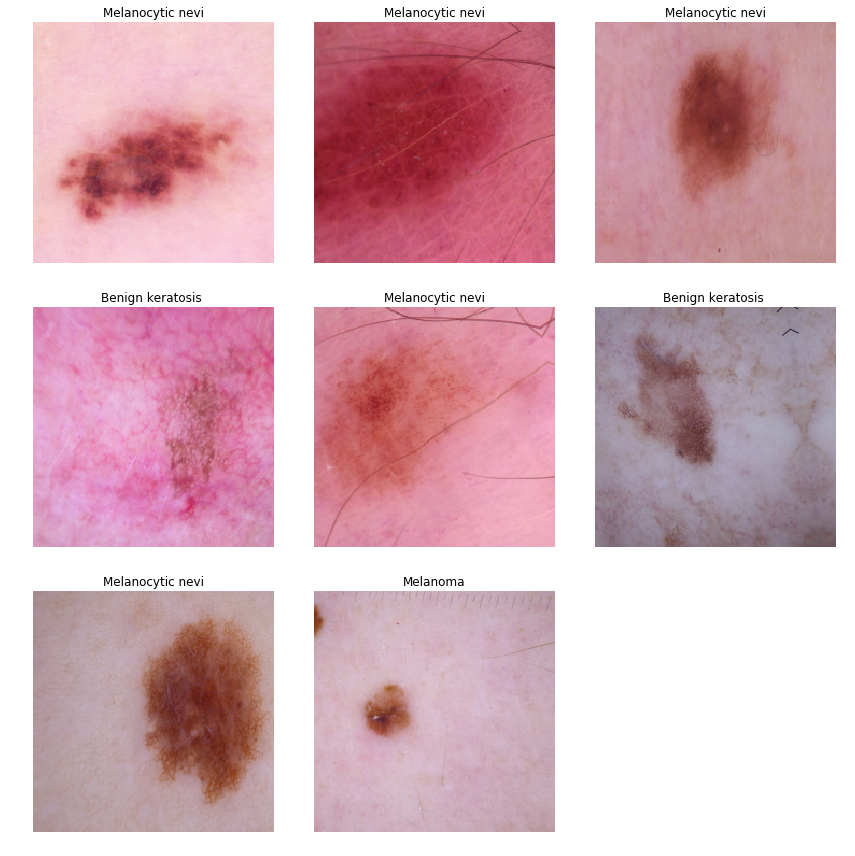

In [77]:
data.show_batch(rows=3)

In [78]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\jyoti.bose/.cache\torch\checkpoints\resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [01:05<00:00, 1330675.81it/s]


In [79]:
from fastai.metrics import error_rate, accuracy

In [80]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [81]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.906871,0.735818,0.735896,1:17:03
1,0.808748,0.662961,0.748877,1:16:28
2,0.724466,0.633510,0.759860,1:16:31
3,0.696814,0.575464,0.788817,1:16:39
4,0.655552,0.559487,0.797803,1:16:31


In [82]:
learn.save('stage-1')

In [83]:
learn.unfreeze()

In [84]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


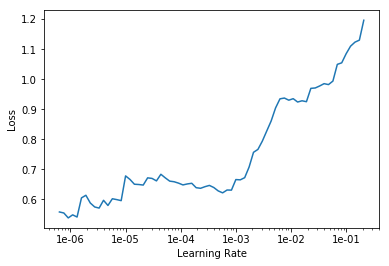

In [85]:
learn.recorder.plot()

In [86]:
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.664323,0.545010,0.800799,1:37:55
1,0.547491,0.480380,0.826760,1:31:17


In [87]:
learn.fit_one_cycle(3,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.561942,0.487960,0.818273,1:31:47
1,0.573490,0.469705,0.824264,1:37:51
2,0.562279,0.462597,0.825761,1:47:48


In [88]:
learn.save('stage-2')

In [89]:
interp = ClassificationInterpretation.from_learner(learn)

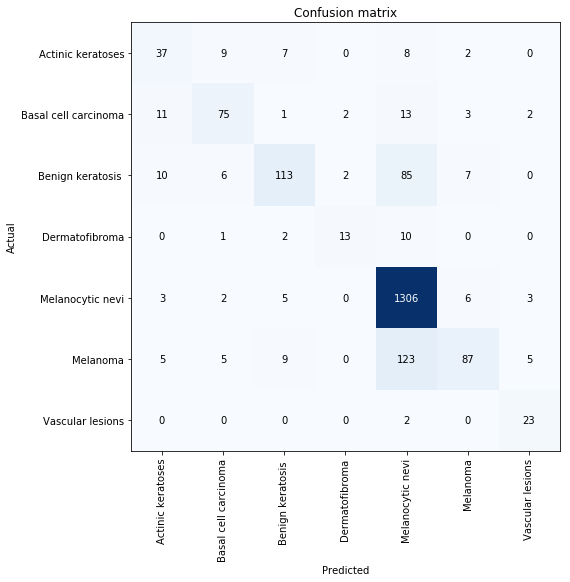

In [90]:
interp.plot_confusion_matrix(figsize=(10,8))

In [91]:
interp.most_confused()

[('Melanoma', 'Melanocytic nevi', 123),
 ('Benign keratosis ', 'Melanocytic nevi', 85),
 ('Basal cell carcinoma', 'Melanocytic nevi', 13),
 ('Basal cell carcinoma', 'Actinic keratoses', 11),
 ('Benign keratosis ', 'Actinic keratoses', 10),
 ('Dermatofibroma', 'Melanocytic nevi', 10),
 ('Actinic keratoses', 'Basal cell carcinoma', 9),
 ('Melanoma', 'Benign keratosis ', 9),
 ('Actinic keratoses', 'Melanocytic nevi', 8),
 ('Actinic keratoses', 'Benign keratosis ', 7),
 ('Benign keratosis ', 'Melanoma', 7),
 ('Benign keratosis ', 'Basal cell carcinoma', 6),
 ('Melanocytic nevi', 'Melanoma', 6),
 ('Melanocytic nevi', 'Benign keratosis ', 5),
 ('Melanoma', 'Actinic keratoses', 5),
 ('Melanoma', 'Basal cell carcinoma', 5),
 ('Melanoma', 'Vascular lesions', 5),
 ('Basal cell carcinoma', 'Melanoma', 3),
 ('Melanocytic nevi', 'Actinic keratoses', 3),
 ('Melanocytic nevi', 'Vascular lesions', 3),
 ('Actinic keratoses', 'Melanoma', 2),
 ('Basal cell carcinoma', 'Dermatofibroma', 2),
 ('Basal cell 

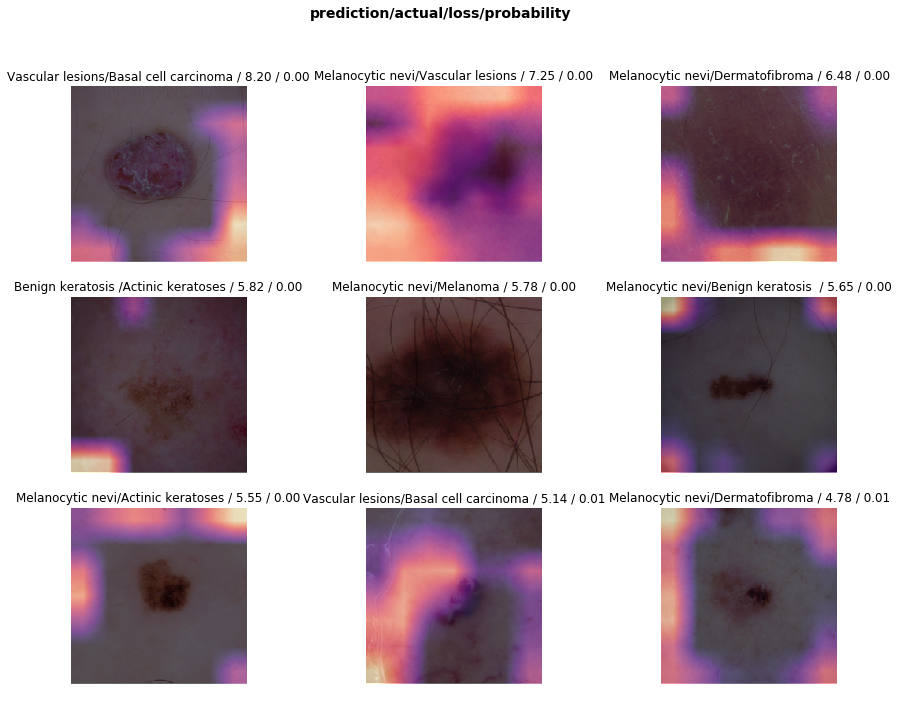

In [92]:
interp.plot_top_losses(9,figsize=(15,11))

In [95]:
doc(ImageDataBunch)

class ImageDataBunch [source] [test] ImageDataBunch ( train_dl : DataLoader , valid_dl : DataLoader , fix_dl : DataLoader = None , test_dl : Optional [ DataLoader ]= None , device : device = None , dl_tfms : Optional [ Collection [ Callable ]]= None , path : PathOrStr = '.' , collate_fn : Callable = 'data_collate' , no_check : bool = False ) :: DataBunch 
 
 × No tests found for ImageDataBunch . To contribute a test please refer to this guide and this discussion . DataBunch suitable for computer vision. 
 Show in docs